Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sb

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
# import function to perform feature selection
from sklearn.feature_selection import RFE

### Q1. Load the dataset 

In [2]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
#several data have very less variance,almost negligible.
#The total_count is 195 for all variables.
#we can see no null values.

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [9]:
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [10]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [11]:
df['status'].value_counts(normalize=True)

1   0.753846
0   0.246154
Name: status, dtype: float64

<AxesSubplot:xlabel='status', ylabel='count'>

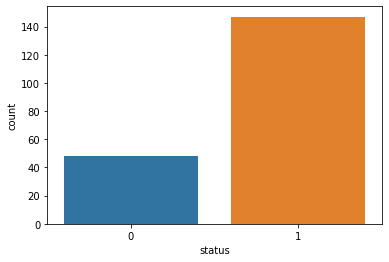

In [12]:
sb.countplot(df['status'])

In [13]:
# 1 is higher than 0 hence,people with parkinson have higher representation.
#Data is highly imbalance.

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [14]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [15]:
df.drop('name',1,inplace=True)

AxesSubplot(0.125,0.125;0.775x0.755)


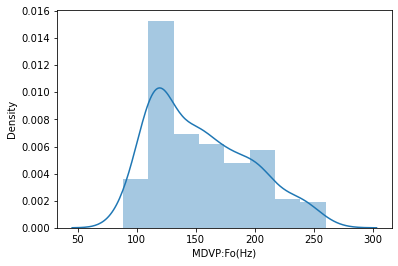

AxesSubplot(0.125,0.125;0.775x0.755)


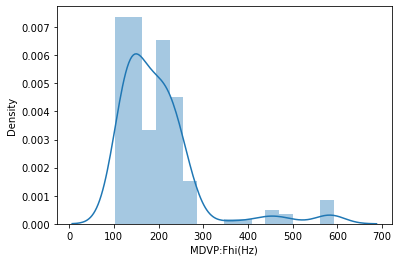

AxesSubplot(0.125,0.125;0.775x0.755)


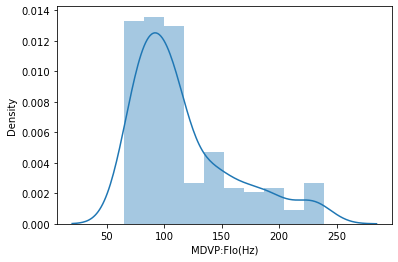

AxesSubplot(0.125,0.125;0.775x0.755)


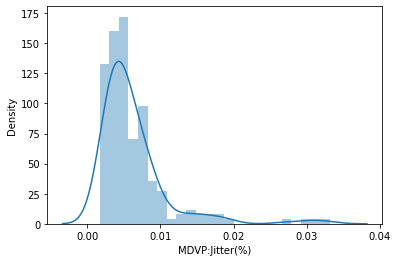

AxesSubplot(0.125,0.125;0.775x0.755)


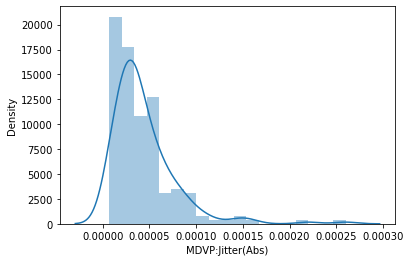

AxesSubplot(0.125,0.125;0.775x0.755)


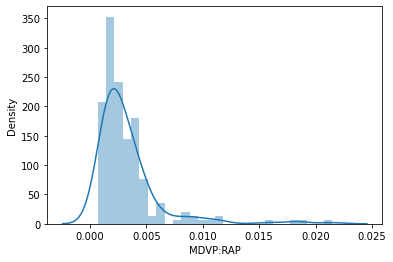

AxesSubplot(0.125,0.125;0.775x0.755)


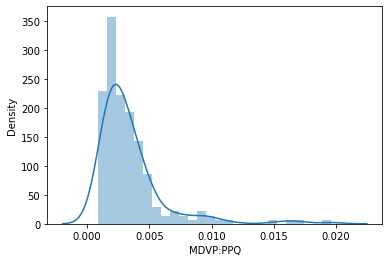

AxesSubplot(0.125,0.125;0.775x0.755)


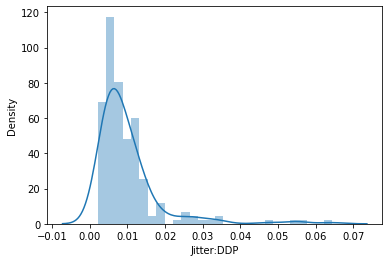

AxesSubplot(0.125,0.125;0.775x0.755)


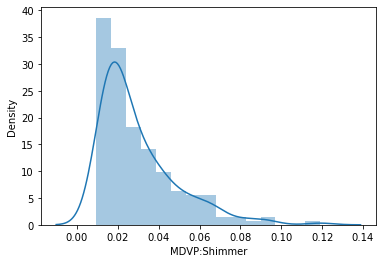

AxesSubplot(0.125,0.125;0.775x0.755)


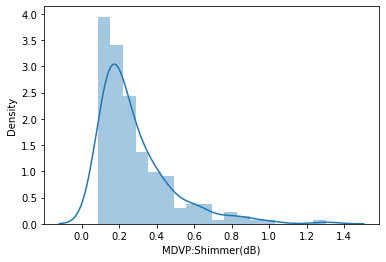

AxesSubplot(0.125,0.125;0.775x0.755)


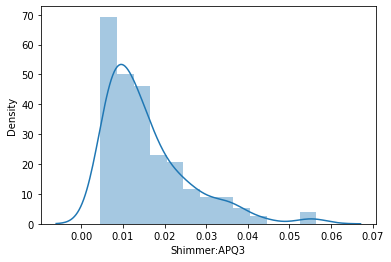

AxesSubplot(0.125,0.125;0.775x0.755)


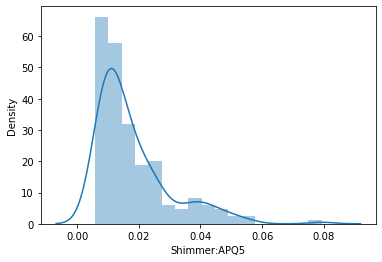

AxesSubplot(0.125,0.125;0.775x0.755)


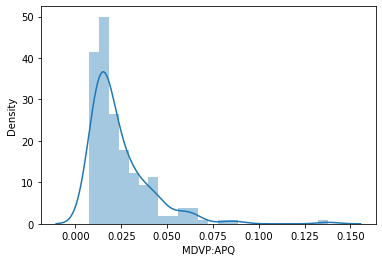

AxesSubplot(0.125,0.125;0.775x0.755)


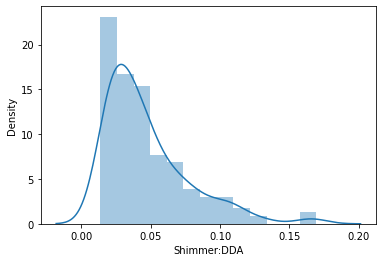

AxesSubplot(0.125,0.125;0.775x0.755)


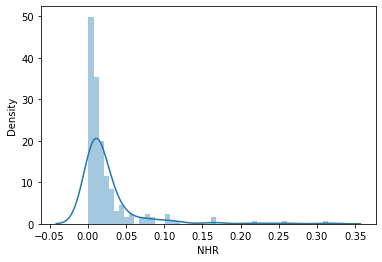

AxesSubplot(0.125,0.125;0.775x0.755)


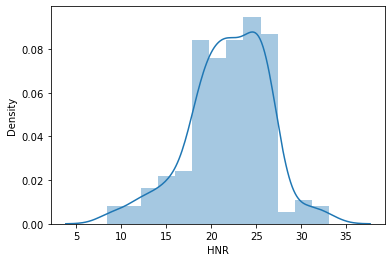

AxesSubplot(0.125,0.125;0.775x0.755)


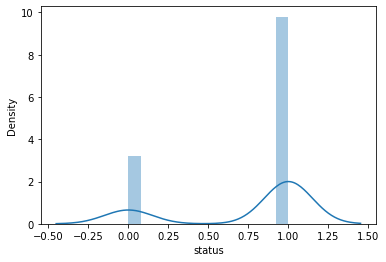

AxesSubplot(0.125,0.125;0.775x0.755)


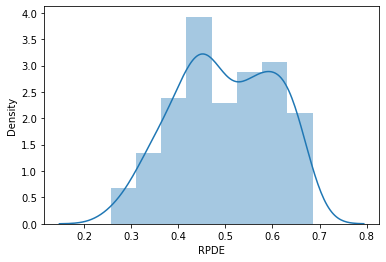

AxesSubplot(0.125,0.125;0.775x0.755)


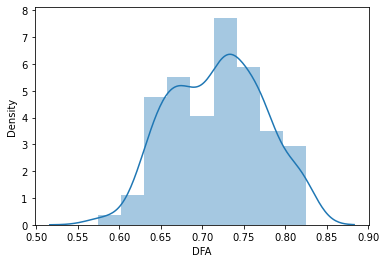

AxesSubplot(0.125,0.125;0.775x0.755)


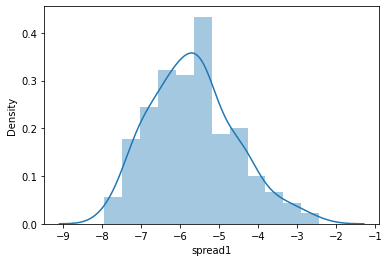

AxesSubplot(0.125,0.125;0.775x0.755)


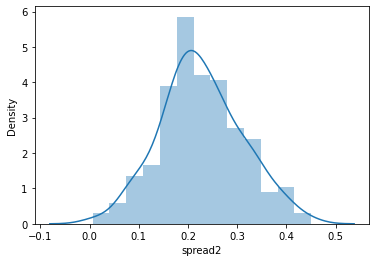

AxesSubplot(0.125,0.125;0.775x0.755)


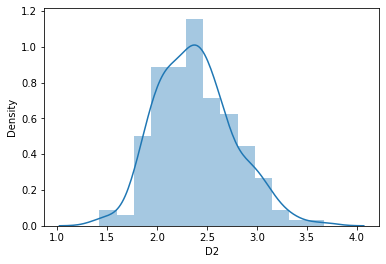

AxesSubplot(0.125,0.125;0.775x0.755)


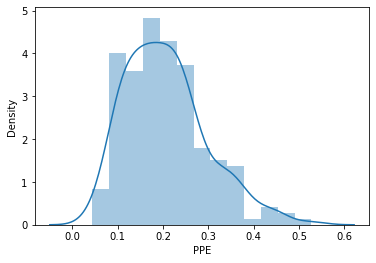

In [16]:
for i in df.columns:
    print(sb.distplot(df[i]))
    plt.show()

In [17]:
#Most of the plots are right skewed.

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

AxesSubplot(0.125,0.125;0.775x0.755)


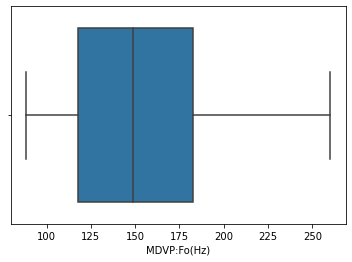

AxesSubplot(0.125,0.125;0.775x0.755)


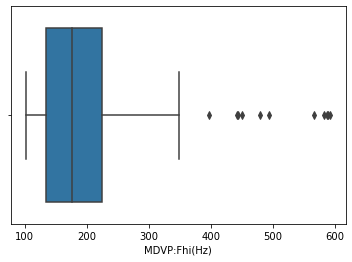

AxesSubplot(0.125,0.125;0.775x0.755)


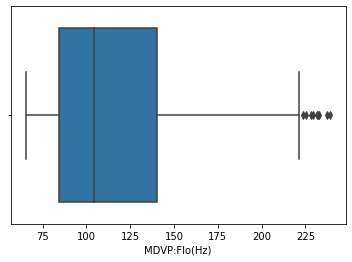

AxesSubplot(0.125,0.125;0.775x0.755)


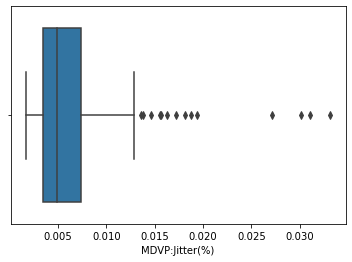

AxesSubplot(0.125,0.125;0.775x0.755)


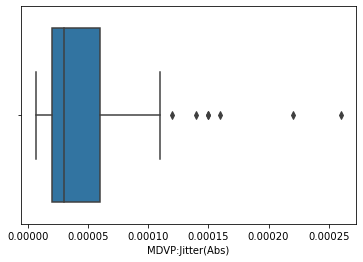

AxesSubplot(0.125,0.125;0.775x0.755)


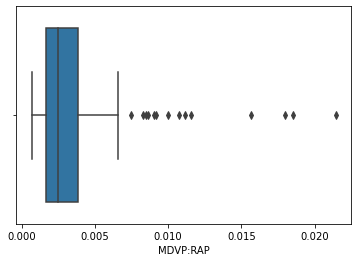

AxesSubplot(0.125,0.125;0.775x0.755)


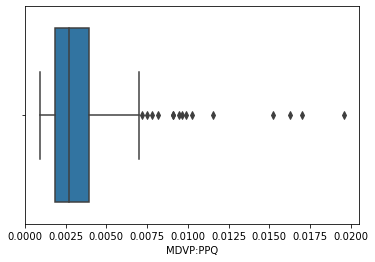

AxesSubplot(0.125,0.125;0.775x0.755)


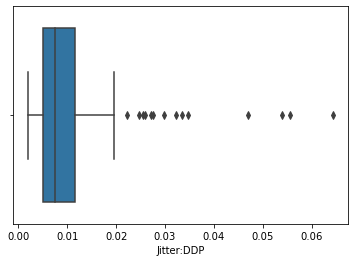

AxesSubplot(0.125,0.125;0.775x0.755)


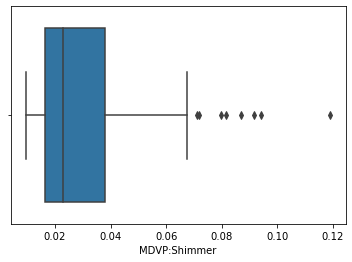

AxesSubplot(0.125,0.125;0.775x0.755)


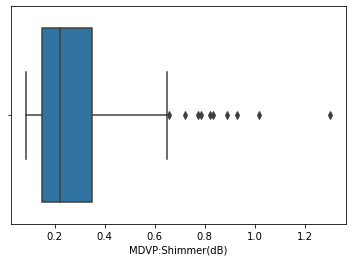

AxesSubplot(0.125,0.125;0.775x0.755)


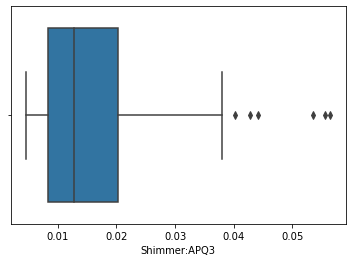

AxesSubplot(0.125,0.125;0.775x0.755)


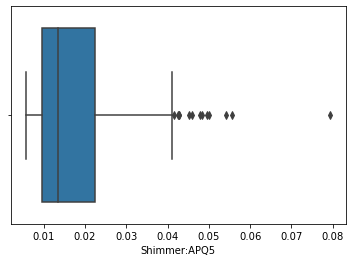

AxesSubplot(0.125,0.125;0.775x0.755)


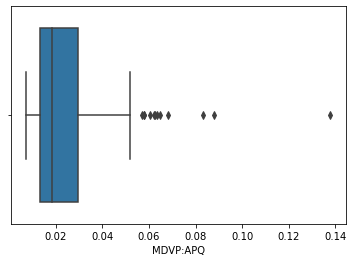

AxesSubplot(0.125,0.125;0.775x0.755)


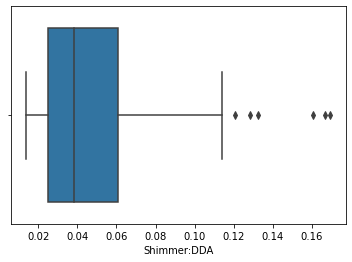

AxesSubplot(0.125,0.125;0.775x0.755)


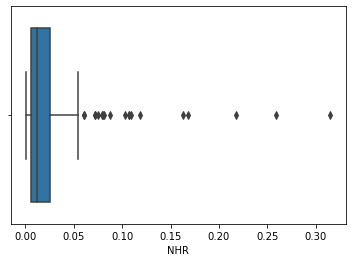

AxesSubplot(0.125,0.125;0.775x0.755)


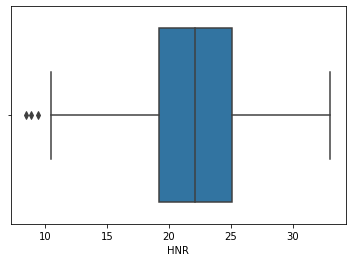

AxesSubplot(0.125,0.125;0.775x0.755)


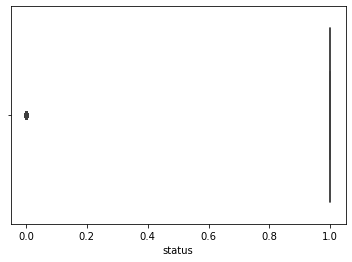

AxesSubplot(0.125,0.125;0.775x0.755)


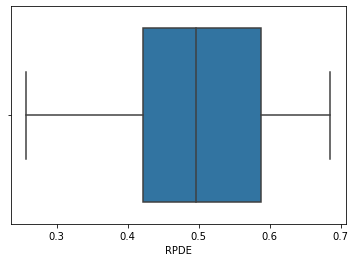

AxesSubplot(0.125,0.125;0.775x0.755)


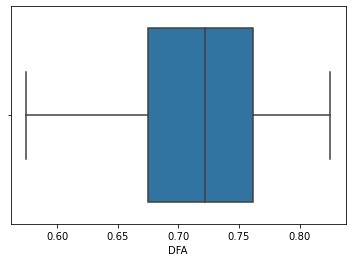

AxesSubplot(0.125,0.125;0.775x0.755)


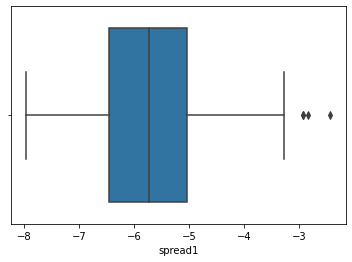

AxesSubplot(0.125,0.125;0.775x0.755)


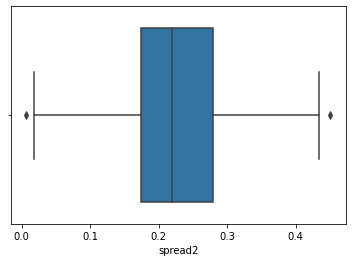

AxesSubplot(0.125,0.125;0.775x0.755)


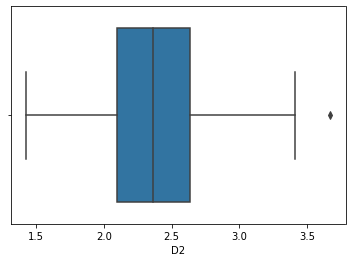

AxesSubplot(0.125,0.125;0.775x0.755)


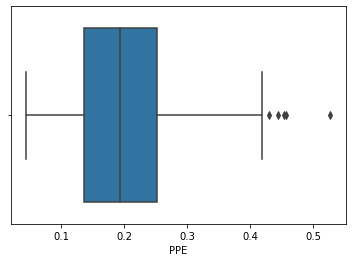

In [18]:
for i in df.columns:
    print(sb.boxplot(df[i]))
    plt.show()

In [19]:
#Almost all variables have outliers.

### Q7. Are there any strong correlations among the independent features?

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
x=df.drop('status',1)

In [22]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [23]:
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
10,Shimmer:APQ3,51152986.518916
13,Shimmer:DDA,51126303.411585
7,Jitter:DDP,3103948.971369
5,MDVP:RAP,3101964.447447
8,MDVP:Shimmer,2653.656644
3,MDVP:Jitter(%),506.560577
17,DFA,414.914997
18,spread1,384.369565
11,Shimmer:APQ5,342.841149
9,MDVP:Shimmer(dB),303.102407


In [24]:
#High correlation between independent variables.

### Q8. Split dataset into training & test dataset  

In [25]:
x=df.drop('status',1)
y=df['status']

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=15)

### Q9. Create a default decision tree model using criterion = Entropy 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [29]:
ytest_pred=dt.predict(xtest)
ytest_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.96      0.84      0.90        32

    accuracy                           0.85        39
   macro avg       0.75      0.85      0.78        39
weighted avg       0.89      0.85      0.86        39



In [31]:
#f1 score 88%

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [32]:
#Lets use gridsearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
df.shape

(195, 23)

In [35]:
params={'criterion':['gini','entropy'],
       'max_depth':np.arange(1,11,2),
       'min_samples_leaf':np.arange(1,10)}

In [36]:
dt=DecisionTreeClassifier()
grd=GridSearchCV(dt,param_grid=params,cv=5,scoring='f1_weighted')
grd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 3, 5, 7, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1_weighted')

In [37]:
#best features
bst_feat=grd.best_estimator_
bst_feat

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [38]:
dt_fin=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)
dt_fin.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [39]:
ypred_fin=dt_fin.predict(xtest)
ypred_fin

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
print(classification_report(ytest,ypred_fin))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



In [41]:
#f1_score 91% .
#We have achieved better performance after regularization.

In [42]:
#The regularization parameter is a control on your fitting parameters.
#It helps avoiding overfit models.
#It also helps to reduce error with better performance .

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [45]:
params={'n_estimators':np.arange(100,200)}

In [46]:
grd_rf=GridSearchCV(rf,param_grid=params,cv=6,scoring='f1_weighted')
grd_rf.fit(xtrain,ytrain)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])},
             scoring='f1_weighted')

In [47]:
grd_rf.best_estimator_

RandomForestClassifier(n_estimators=114)

In [48]:
grd_rf.best_params_

{'n_estimators': 114}

In [49]:
#Optimal number of trees is 140

In [50]:
rf_fin=RandomForestClassifier(n_estimators=140)
rf_fin.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=140)

In [51]:
ypred_test_rf=rf_fin.predict(xtest)

In [52]:
print(classification_report(ytest,ypred_test_rf))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [53]:
#f1_score 95%
#very high performance and the best of above models.

# Feature Importances

In [54]:
f_imp=pd.DataFrame({'Features':xtrain.columns,'score':rf_fin.feature_importances_})
f_imp.sort_values(by='score',ascending=False)

,Features,score
21,PPE,0.151562
18,spread1,0.097553
0,MDVP:Fo(Hz),0.090371
19,spread2,0.061918
2,MDVP:Flo(Hz),0.050427
14,NHR,0.047335
5,MDVP:RAP,0.044521
4,MDVP:Jitter(Abs),0.041829
1,MDVP:Fhi(Hz),0.040296
12,MDVP:APQ,0.037021
